In [5]:
from train import CarNumbersDataset
import numpy as np
import albumentations as A

import matplotlib.pyplot as plt

In [6]:
transform = A.Compose([
    A.LongestMaxSize(max_size=224),
])
dataset = CarNumbersDataset('../dataset/classification/train.csv', transform=transform)

In [ ]:
def 

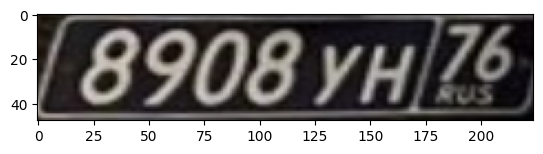

In [19]:
index = 10

plt.imshow(dataset[index][0].numpy().astype(np.uint8))
plt.show()